In [1]:
#Done
import os
import sys
from os import listdir
from os.path import isfile, join
import IPython.display as ipd
import librosa 
import librosa.display
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import wavfile as wav
import numpy as np
from timeit import default_timer as timer

In [2]:
def extract_MElandChroma_stft(filename):
    audio,sample_rate=librosa.load(filename, res_type='kaiser_fast')
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=audio, sr=sample_rate,n_chroma=50).T,axis=0)
    mel=np.mean(librosa.feature.melspectrogram(audio ,sr=sample_rate, n_mels=50,fmax=8000).T, axis=0)
    
    return chroma_stft, mel

In [3]:
a=extract_MElandChroma_stft("UrbanSound8K/audio/fold1/103074-7-0-1.wav")

In [4]:
metadata=pd.read_csv("UrbanSound8k/metadata/UrbanSound8k.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [5]:
fold_list = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10']

In [6]:
stacked_features = []
exceptions=0

start_time = timer()
for i in range(10):
    # get file names
    mypath = 'UrbanSound8K/audio/'+ fold_list[i] + '/'
    files = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]
    
    for fn in files:
        try: # extract features
            mfccs,stft = extract_MElandChroma_stft(fn)
            features=np.reshape((np.hstack([mfccs,stft])),(20,5))
    
            
            
        except: # else exception (.ds_store files are part of mac file systems)
            print(fn)
            exceptions += 1
            continue
            
        l_row = metadata.loc[metadata['slice_file_name']==fn.split('/')[-1]].values.tolist()
        label = l_row[0][-1]
        fold = i+1
    
        stacked_features.append([features, features.shape, label, fold])
        
            #print(f,old_samplerate,ss)
        
print("Exceptions: ", exceptions)
end_time = timer()
print(print("time taken: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60)))
print('Finished feature extraction from all folder')

C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


UrbanSound8K/audio/fold1/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(


UrbanSound8K/audio/fold2/.DS_Store
UrbanSound8K/audio/fold3/.DS_Store
UrbanSound8K/audio/fold4/.DS_Store
UrbanSound8K/audio/fold5/.DS_Store
UrbanSound8K/audio/fold6/.DS_Store
UrbanSound8K/audio/fold7/.DS_Store
UrbanSound8K/audio/fold8/.DS_Store
UrbanSound8K/audio/fold9/.DS_Store
UrbanSound8K/audio/fold10/.DS_Store
Exceptions:  10
time taken: 29.0 minutes 59.3 seconds
None
Finished feature extraction from all folder


In [8]:
cols=['Stacked_Features', 'Matrix_Shape', 'Label', 'Fold']
Stacked_feature_pd=pd.DataFrame(data=stacked_features , columns=cols)
Stacked_feature_pd.head()

,Stacked_Features,Matrix_Shape,Label,Fold
0,"[[0.43009543, 0.42641523, 0.42061862, 0.430975...","(20, 5)",dog_bark,1
1,"[[0.35211265, 0.34623802, 0.32027006, 0.302557...","(20, 5)",dog_bark,1
2,"[[0.40203726, 0.41237363, 0.4372927, 0.4695518...","(20, 5)",dog_bark,1
3,"[[0.15579388, 0.15788382, 0.15425776, 0.168307...","(20, 5)",dog_bark,1
4,"[[0.58354944, 0.58172417, 0.582746, 0.54908836...","(20, 5)",gun_shot,1


In [9]:
Stacked_feature_pd.Label.unique()

array(['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

X = np.reshape(np.array(Stacked_feature_pd.Stacked_Features.tolist()), (8732, 100))
y = np.array(Stacked_feature_pd.Label.tolist())

le = LabelEncoder()
yy = le.fit_transform(y)
print(yy.shape)

(8732,)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [12]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(scaler.fit_transform(X), yy, test_size=0.2,random_state=42)

In [13]:
print(x_train.shape, x_test.shape, y_train.shape , y_test.shape)

(6985, 100) (1747, 100) (6985,) (1747,)


In [14]:
print(x_train[0][:10])

[-0.3899997  -0.05997923 -0.59593135 -0.62817645 -0.70585614 -0.5563699
 -0.5596803  -0.74071896 -0.80090714 -0.6584303 ]


### Classification using KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn_model=KNeighborsClassifier(n_neighbors=6) 

In [17]:
x_train=np.reshape(x_train,(6985,100))
x_test=np.reshape(x_test,(1747,100))
x_train.shape

(6985, 100)

In [18]:
start_time=timer()
knn_model.fit(x_train, y_train)
end_time=timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 0.77 secs


In [19]:
print("Training accuracy is {:.2f}".format(knn_model.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(knn_model.score(x_test, y_test)))

Training accuracy is 0.76
Testing accuracy is 0.67


### Classification using Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log = LogisticRegression(max_iter=1000)

In [23]:
start = timer()
log.fit(x_train, y_train)
end = timer()
print("Total Time required is {:.2f} mins and {:.2f} secs".format( (end- start)//60 , (end - start)%60 ))

Total Time required is 0.00 mins and 9.94 secs


In [24]:
print("Training accuracy is {:.2f}".format(log.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(log.score(x_test, y_test)))

Training accuracy is 0.61
Testing accuracy is 0.57


### Classification using Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()

In [26]:
start_time=timer()
tree_model.fit(x_train, y_train)
end_time=timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 2.66 secs


In [27]:
print("Training accuracy is {}".format(tree_model.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(tree_model.score(x_test, y_test)))

Training accuracy is 1.0
Testing accuracy is 0.69


### Classification using SVM

In [28]:
from sklearn.svm import SVC

In [29]:
svc= SVC(kernel="rbf")

In [30]:
start_time=timer()
svc.fit(x_train, y_train)
end_time=timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 15.14 secs


In [31]:
print("Training accuracy is {}".format(svc.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(svc.score(x_test, y_test)))

Training accuracy is 0.7148174659985683
Testing accuracy is 0.69


### Classification using Ensemble Classifiers

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf=RandomForestClassifier(n_estimators=500)

In [34]:
start_time=timer()
rf.fit(x_train, y_train)
end_time=timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 1.00 mins and 15.95 secs


In [35]:
print("Training accuracy is {}".format(rf.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(rf.score(x_test, y_test)))

Training accuracy is 1.0
Testing accuracy is 0.87


**Overfitting using RandomForestClassifiers**

In [36]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [37]:
bg=BaggingClassifier()

In [38]:
start_time = timer()
bg.fit(x_train, y_train)
end_time = timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 15.39 secs


In [39]:
print("Training accuracy of the Bagging Classifier {:.2f}".format(bg.score(x_train, y_train)) )
print("Testing accuracy of the Bagging Classifier {:.2f}".format(bg.score(x_test, y_test)) )

Training accuracy of the Bagging Classifier 1.00
Testing accuracy of the Bagging Classifier 0.82


In [40]:
ada= AdaBoostClassifier()

In [41]:
start_time= timer()
ada.fit(x_train, y_train)
end_time= timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 11.43 secs


In [42]:
print("Training accuracy of the AdaBoost Classifier {:.2f}".format(ada.score(x_train, y_train)) )
print("Testing accuracy of the AdaBoost Classifier {:.2f}".format(ada.score(x_test, y_test)) )

Training accuracy of the AdaBoost Classifier 0.38
Testing accuracy of the AdaBoost Classifier 0.37


In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
gbc = GradientBoostingClassifier()
start_time= timer()
gbc.fit(x_train, y_train)
end_time= timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 9.00 mins and 8.98 secs


In [45]:
print("Training accuracy of the Gradient Boosting Classifier {:.2f}".format(gbc.score(x_train, y_train)) )
print("Testing accuracy of the Gradient Boosting Classifier {:.2f}".format(gbc.score(x_test, y_test)) )

Training accuracy of the Gradient Boosting Classifier 0.92
Testing accuracy of the Gradient Boosting Classifier 0.80


In [47]:
### Unsupervised Learning 
from sklearn.cluster import KMeans
kms= KMeans(n_clusters=10)

In [48]:
kms.fit(x_train)

KMeans(n_clusters=10)

In [49]:
pd.crosstab(kms.predict(x_train), y_train)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,0,12,0,0,14,0,2,0,0,0
1,296,5,71,57,8,261,107,123,23,28
2,58,230,152,190,110,7,3,16,325,284
3,151,13,120,89,164,158,41,188,50,58
4,0,3,0,21,96,1,102,35,0,10
5,169,15,104,113,112,239,54,288,28,65
6,0,0,0,2,0,0,0,0,0,0
7,5,3,3,20,0,0,0,0,108,1
8,0,0,0,1,1,54,0,0,0,3


In [50]:
### Visualizing the clusters formed with the MFCC features 
from sklearn.decomposition import PCA

In [51]:
cols=["mfcc_"+str(i) for i in range(1,101)]

In [52]:
X.shape

(8732, 100)

In [53]:
mfcc_pd=pd.DataFrame(data=scaler.fit_transform(X), columns=cols)
mfcc_pd["labels"]=y
mfcc_pd.head()


,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_92,mfcc_93,mfcc_94,mfcc_95,mfcc_96,mfcc_97,mfcc_98,mfcc_99,mfcc_100,labels
0,0.497843,0.432147,0.379788,0.443570,0.498449,0.605113,0.688798,0.526848,0.360549,0.151806,...,-0.177341,-0.189847,-0.126969,-0.188137,-0.172028,-0.158225,-0.184160,-0.154541,-0.179509,dog_bark
1,0.074050,0.011797,-0.135930,-0.221633,-0.326678,-0.401499,-0.422980,-0.427155,-0.459048,-0.535705,...,-0.177354,-0.189884,-0.127020,-0.188076,-0.171266,-0.157476,-0.183589,-0.154435,-0.179375,dog_bark
2,0.345362,0.358531,0.465480,0.643396,0.943979,1.047848,1.029263,0.945167,0.854611,0.817010,...,-0.177424,-0.189552,-0.126883,-0.186537,-0.173010,-0.159194,-0.184574,-0.154456,-0.179446,dog_bark
3,-0.992835,-0.975700,-0.989111,-0.917051,-0.894903,-0.913511,-0.700101,-0.671147,-0.480429,-0.312140,...,-0.174272,-0.188489,-0.126800,-0.189607,-0.176253,-0.160551,-0.184574,-0.154189,-0.178998,dog_bark
4,1.331781,1.246396,1.213004,1.055396,0.800220,0.664641,0.594775,0.527876,0.398730,0.370381,...,-0.170462,-0.182218,-0.124614,-0.184443,-0.170780,-0.156545,-0.179914,-0.150751,-0.175385,gun_shot


In [54]:
pca=PCA(n_components=2)

In [55]:
pcas=pca.fit_transform(mfcc_pd.drop("labels", axis=1))

In [56]:
pca_cols=["pca_"+str(i) for i in range(1,3)]

In [57]:
main_df=pd.DataFrame(data=pcas, columns=pca_cols)
main_df["labels"]=y
main_df.head()

,pca_1,pca_2,labels
0,-1.437237,-0.378691,dog_bark
1,0.868295,-0.718894,dog_bark
2,-4.179698,-0.358877,dog_bark
3,3.207838,-1.650412,dog_bark
4,-5.689515,-0.672657,gun_shot


In [58]:
main_df.labels.unique()

array(['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn'], dtype=object)

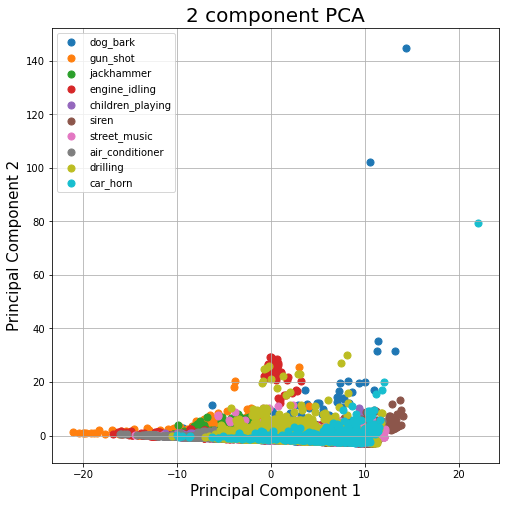

In [60]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1, 1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for target, color in zip(targets,colors):
    indicesToKeep = main_df['labels']== target
    #print(indicesToKeep[:10])
    ax.scatter(list(main_df.loc[indicesToKeep, 'pca_1'])
               ,list(main_df.loc[indicesToKeep, 'pca_2'])
               , c = color
               , s = 50)
ax.legend(['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn'])
ax.grid()

In [61]:
pcas=pca.explained_variance_ratio_
print("Total information ", sum(pcas))

Total information  0.46184371411800385


In [62]:
x_train, x_test, y_train, y_test = train_test_split(main_df.drop("labels", axis=1), main_df["labels"], test_size=0.2, random_state=42)

In [63]:
print(x_train.shape, x_test.shape, y_train.shape , y_test.shape)

(6985, 2) (1747, 2) (6985,) (1747,)


In [64]:
svc_2=SVC()
svc_2.fit(x_train, y_train)

SVC()

In [65]:
svc_2.score(x_test, y_test)

0.3096737263880939

In [66]:
x_test.shape[1]

2

In [67]:
# Predictions using SVC on 50 features
predictions=svc_2.predict(x_test)


In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
 mat=confusion_matrix(predictions, y_test)

In [70]:
def acc_per_class(np_probs_array):    
    accs = []
    for idx in range(0, np_probs_array.shape[0]):
        correct = np_probs_array[idx][idx].astype(int)
        total = np_probs_array[idx].sum().astype(int)
        acc = (correct / total) * 100
        accs.append(acc)
    return accs

In [71]:
accuracies=acc_per_class(mat)
labels = [
        'Air Conditioner',
        'Car Horn',
        'Children Playing',
        'Dog bark',
        'Drilling',
        'Engine Idling',
        'Gun Shot',
        'Jackhammer',
        'Siren',
        'Street Music'
    ]

pd.DataFrame({'CLASS':labels, 'ACCURACY': accuracies}).sort_values(by='ACCURACY', ascending=False)

,CLASS,ACCURACY
6,Gun Shot,53.846154
8,Siren,50.000000
4,Drilling,38.255034
7,Jackhammer,37.500000
0,Air Conditioner,31.854839
3,Dog bark,27.272727
9,Street Music,24.295775
2,Children Playing,23.809524
5,Engine Idling,22.784810
1,Car Horn,0.000000
